# **PART 1 — Data Collection**

Both datasets were imported into the analysis environment.
The structure, variable types, and the first few observations from each dataset were displayed to assess the initial quality and suitability for analysis.
Since the datasets used different identifier formats (string IDs vs. numeric IDs), they were treated as independent sources of information.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load both datasets
exam = pd.read_csv("/student_exam_scores.csv")
perf = pd.read_csv("/SrudentPerformanceScore.csv")

# Display basic structure
print(exam.head())
print(exam.info())

print(perf.head())
print(perf.info())

print("\nThe datasets use different ID formats and cannot be merged. They will be analyzed separately.\n")


  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_score

# **PART 2 — Data Cleaning**

Column names were standardized to lowercase for consistency.
Both datasets were examined for missing values, invalid entries, and unusual data points.
No missing or inconsistent values were detected, and all numerical variables contained valid ranges.
Given the structural differences in student identifier formats, it was concluded that the two datasets do not originate from the same observations; therefore, they were processed independently without attempting to merge them.

In [7]:
# Standardize column names
exam.columns = exam.columns.str.lower()
perf.columns = perf.columns.str.lower()

# Missing value check
print("Missing values in Exam dataset:")
print(exam.isnull().sum())

print("\nMissing values in Performance dataset:")
print(perf.isnull().sum())

# Remove impossible or negative values (if any)
exam = exam[exam["sleep_hours"] >= 0]
perf = perf[perf["sleep_hours"] >= 0]


Missing values in Exam dataset:
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

Missing values in Performance dataset:
student_id              0
performance_score       0
sleep_hours             0
stress_level            0
previous_exam_scores    0
study_hours             0
dtype: int64


# **PART 3 — Exploratory Data Analysis (EDA) — Dataset 1**

Descriptive statistics were generated to summarize central tendencies and variability for key variables such as sleep hours, study hours, attendance percentage, and exam scores.
Distributional patterns were visualized through histograms, providing insight into the spread of each variable.
Scatter plots were used to examine potential relationships between independent variables and exam performance.
A correlation matrix was computed and visualized to identify linear associations among all numeric features.

       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300000  


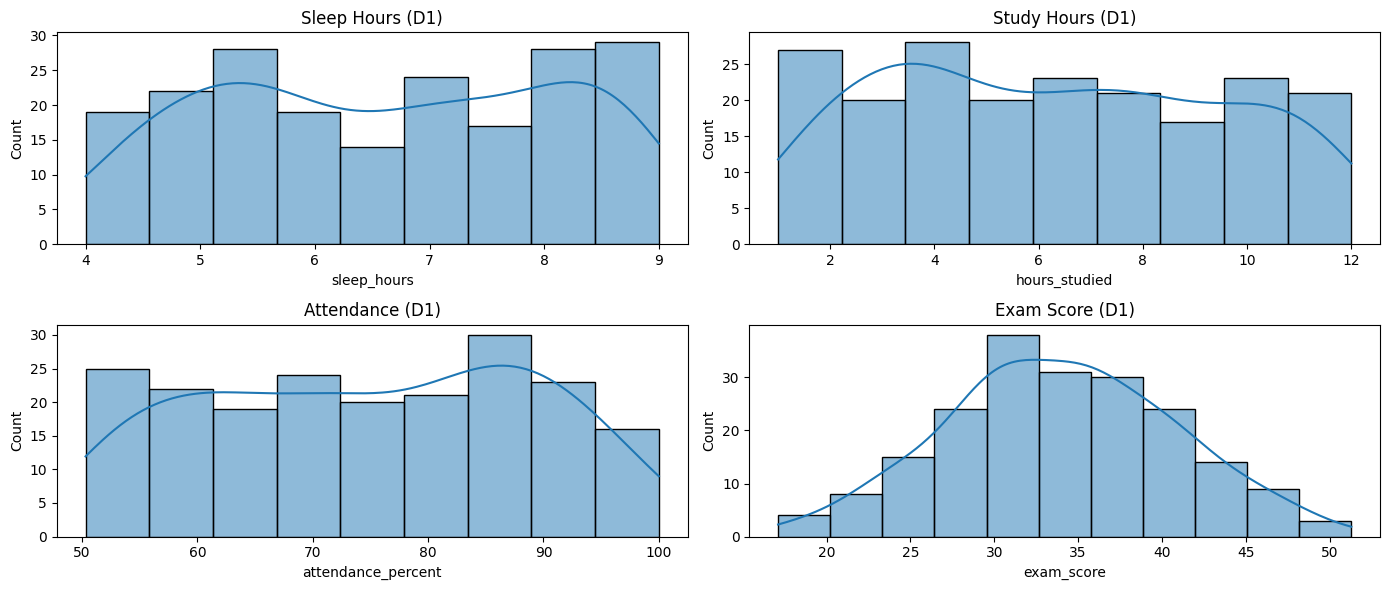

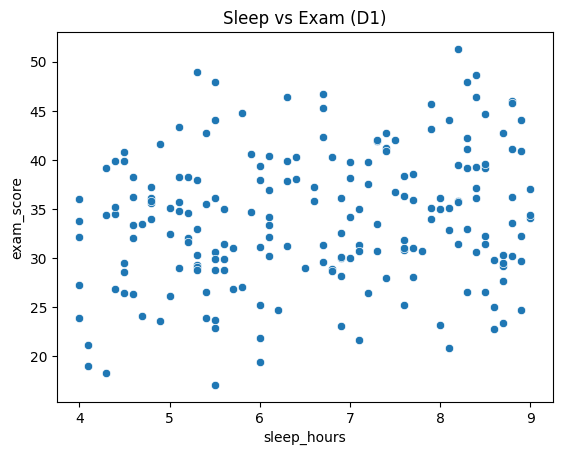

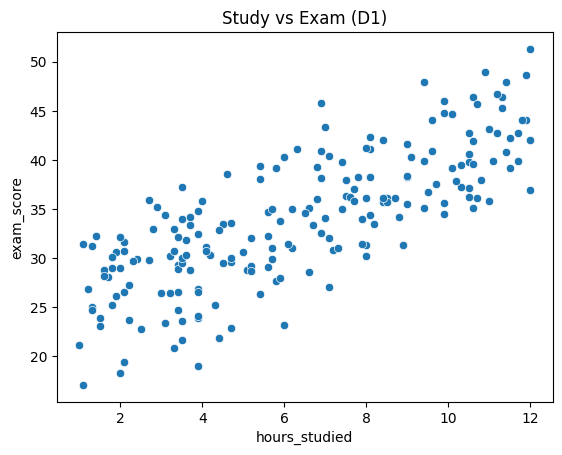

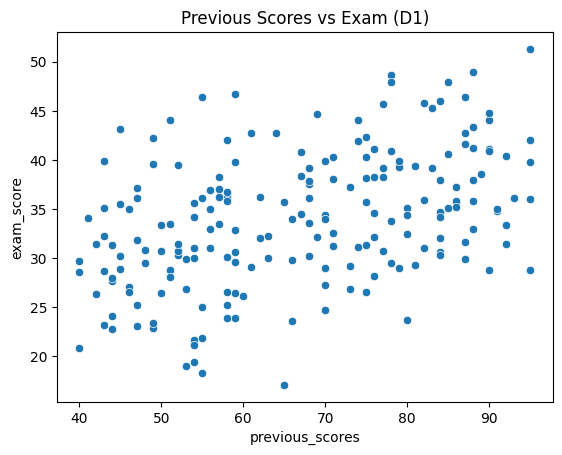

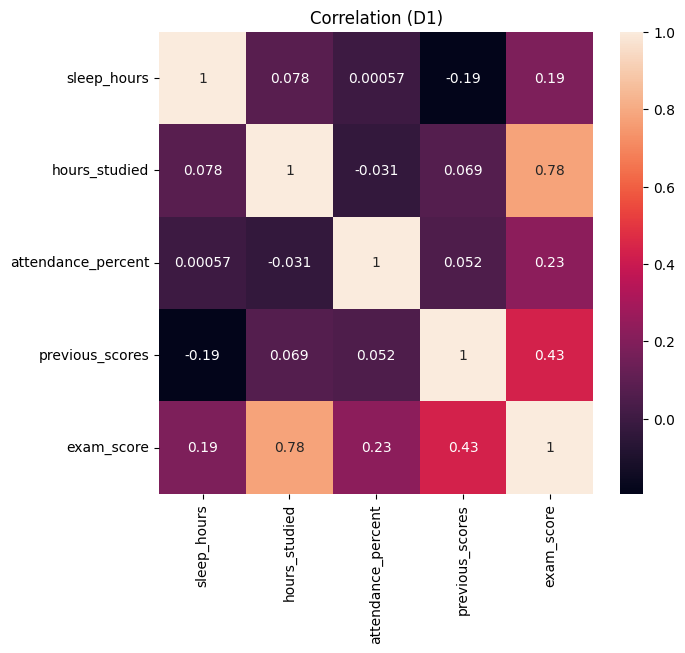

In [8]:
print(exam.describe())

plt.figure(figsize=(14,6))
plt.subplot(2,2,1); sns.histplot(exam["sleep_hours"], kde=True)
plt.title("Sleep Hours (D1)")

plt.subplot(2,2,2); sns.histplot(exam["hours_studied"], kde=True)
plt.title("Study Hours (D1)")

plt.subplot(2,2,3); sns.histplot(exam["attendance_percent"], kde=True)
plt.title("Attendance (D1)")

plt.subplot(2,2,4); sns.histplot(exam["exam_score"], kde=True)
plt.title("Exam Score (D1)")

plt.tight_layout(); plt.show()

sns.scatterplot(x=exam["sleep_hours"], y=exam["exam_score"])
plt.title("Sleep vs Exam (D1)")
plt.show()

sns.scatterplot(x=exam["hours_studied"], y=exam["exam_score"])
plt.title("Study vs Exam (D1)")
plt.show()

sns.scatterplot(x=exam["previous_scores"], y=exam["exam_score"])
plt.title("Previous Scores vs Exam (D1)")
plt.show()

plt.figure(figsize=(7,6))
sns.heatmap(exam[["sleep_hours","hours_studied","attendance_percent","previous_scores","exam_score"]].corr(), annot=True)
plt.title("Correlation (D1)")
plt.show()


# **PART 4 — Hypothesis Testing (Dataset 1)**

To explore whether exam performance varied across different sleep-duration categories, an ANOVA test was conducted.
Additionally, a multiple linear regression model was fitted using sleep hours, study hours, attendance, and previous exam scores as predictors.
The regression results provided statistical evidence regarding the significance and contribution of each factor to exam performance.

In [9]:
exam["sleep_category"] = pd.cut(exam["sleep_hours"], bins=[0,6,8,12], labels=["<6","6-8",">8"])
groups = exam.groupby("sleep_category")["exam_score"].apply(list)
anova_stat, anova_p = f_oneway(*groups)
print("\nANOVA Dataset 1:", anova_stat, anova_p)



ANOVA Dataset 1: 4.342617659224875 0.014269743408154055


In [10]:
X = exam[["sleep_hours","hours_studied","attendance_percent","previous_scores"]]
y = exam["exam_score"]
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           8.76e-77
Time:                        15:47:23   Log-Likelihood:                -482.21
No. Observations:                 200   AIC:                             974.4
Df Residuals:                     195   BIC:                             990.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1421      1

# **PART 5 — Exploratory Data Analysis (EDA) — Dataset 2**

Descriptive statistics were calculated for variables in the performance dataset, including sleep hours, study hours, stress level, previous exam scores, and performance score.
Visualizations such as histograms and scatter plots were produced to assess distributions and pairwise relationships.
A correlation heatmap highlighted the strength and direction of linear associations among the variables within this dataset.

       student_id  performance_score  sleep_hours  stress_level  \
count  322.000000         322.000000   322.000000    322.000000   
mean   270.500000          30.966118     7.079938      5.075839   
std     93.097619           8.346712     1.479526      1.947092   
min    110.000000           6.070000     3.140000      1.000000   
25%    190.250000          25.305000     6.132500      3.640000   
50%    270.500000          31.135000     7.060000      5.220000   
75%    350.750000          36.512500     7.940000      6.505000   
max    431.000000          60.430000    11.000000     10.000000   

       previous_exam_scores  study_hours  
count            322.000000   322.000000  
mean              63.325186     4.036180  
std               14.544545     1.999453  
min               15.110000     0.000000  
25%               53.577500     2.692500  
50%               63.385000     3.900000  
75%               71.787500     5.367500  
max              100.000000     9.190000  


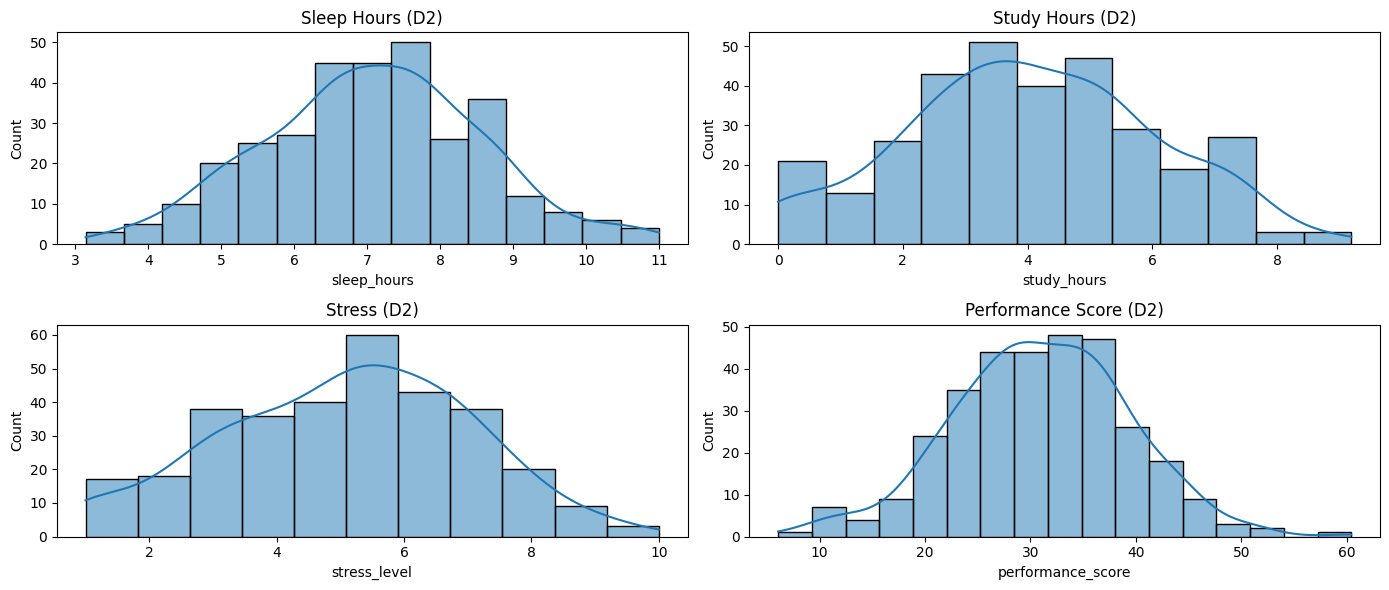

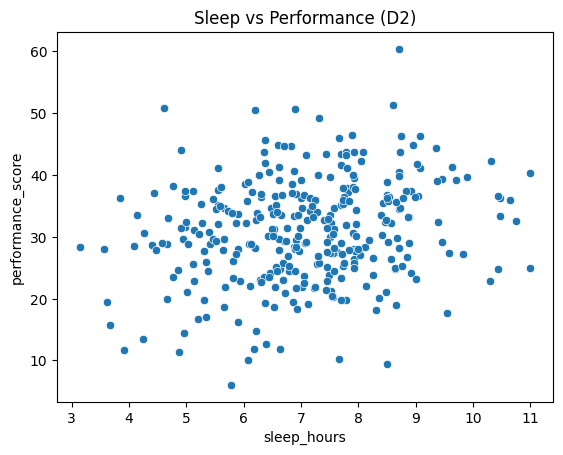

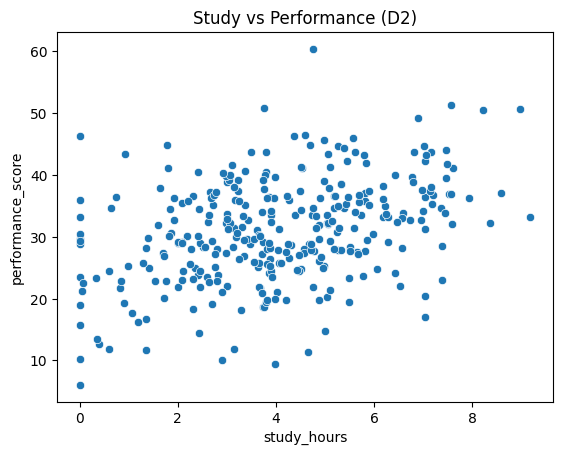

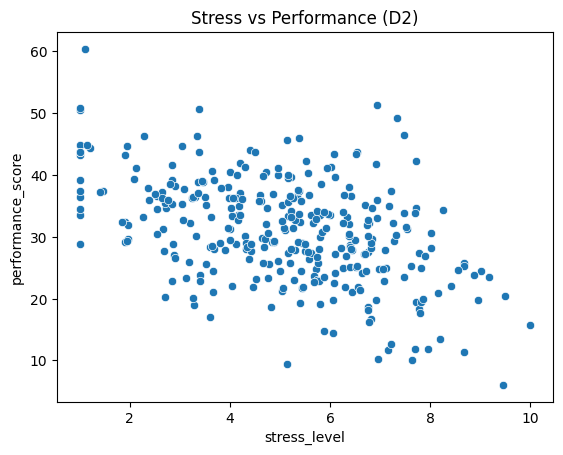

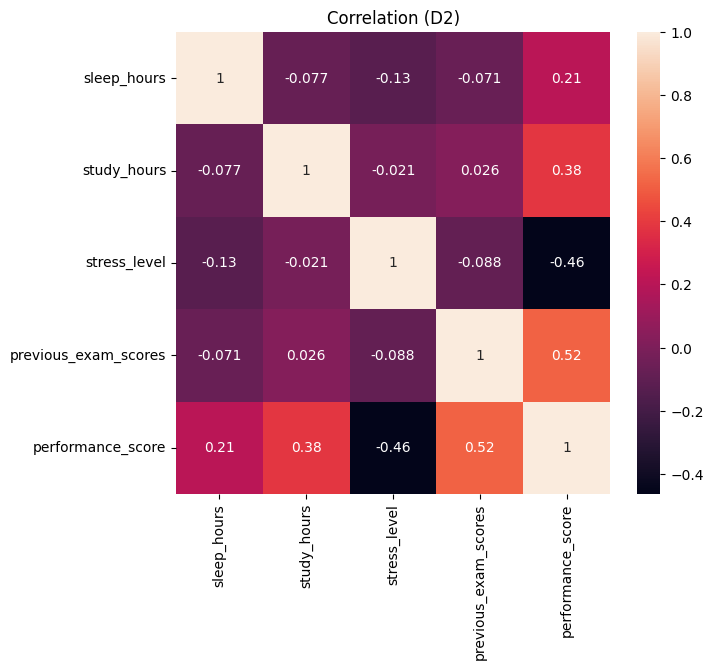

In [11]:
print(perf.describe())

plt.figure(figsize=(14,6))
plt.subplot(2,2,1); sns.histplot(perf["sleep_hours"], kde=True)
plt.title("Sleep Hours (D2)")

plt.subplot(2,2,2); sns.histplot(perf["study_hours"], kde=True)
plt.title("Study Hours (D2)")

plt.subplot(2,2,3); sns.histplot(perf["stress_level"], kde=True)
plt.title("Stress (D2)")

plt.subplot(2,2,4); sns.histplot(perf["performance_score"], kde=True)
plt.title("Performance Score (D2)")

plt.tight_layout(); plt.show()

sns.scatterplot(x=perf["sleep_hours"], y=perf["performance_score"])
plt.title("Sleep vs Performance (D2)")
plt.show()

sns.scatterplot(x=perf["study_hours"], y=perf["performance_score"])
plt.title("Study vs Performance (D2)")
plt.show()

sns.scatterplot(x=perf["stress_level"], y=perf["performance_score"])
plt.title("Stress vs Performance (D2)")
plt.show()

plt.figure(figsize=(7,6))
sns.heatmap(perf[["sleep_hours","study_hours","stress_level","previous_exam_scores","performance_score"]].corr(), annot=True)
plt.title("Correlation (D2)")
plt.show()


# **PART 6 — Hypothesis Testing (Dataset 2)**

A multiple linear regression analysis was performed to evaluate the combined influence of sleep duration, study habits, stress level, and previous exam scores on the performance score.
The resulting regression coefficients and significance values offered insights into which variables were most strongly associated with academic performance outcomes.



In [12]:
X2 = perf[["sleep_hours","study_hours","stress_level","previous_exam_scores"]]
y2 = perf["performance_score"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:      performance_score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           4.38e-66
Time:                        15:47:54   Log-Likelihood:                -982.09
No. Observations:                 322   AIC:                             1974.
Df Residuals:                     317   BIC:                             1993.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1745 

# **PART 7 — Comparison of the Two Datasets**

A comparative summary was conducted to highlight similarities and differences between the two datasets.
The exam-score dataset included attendance data, enabling an assessment of classroom engagement, while the performance dataset incorporated stress levels, allowing a broader view of psychological influences on academic outcomes.
Both datasets indicated meaningful relationships between sleep, study habits, and academic results, although the specific contributing factors varied due to dataset structure.

In [13]:
print("\nComparison Summary:\n")
print("Dataset 1 analyzes exam scores and includes attendance and previous scores.")
print("Dataset 2 analyzes performance score and includes stress level and previous exam scores.")
print("Both datasets show meaningful relationships between sleep, study habits, stress, and performance.")



Comparison Summary:

Dataset 1 analyzes exam scores and includes attendance and previous scores.
Dataset 2 analyzes performance score and includes stress level and previous exam scores.
Both datasets show meaningful relationships between sleep, study habits, stress, and performance.


# **Part 8 - Conclusion**

The analyses demonstrate that multiple behavioral, academic, and lifestyle factors interact to influence student performance.
Both datasets reveal consistent patterns suggesting that sufficient sleep, effective study habits, and strong prior academic performance are associated with better outcomes.
The inclusion of stress level and attendance variables provides additional perspective on the complexity of academic achievement.
Treatment of the datasets independently ensures methodological accuracy, given their incompatible identifier formats.